<a href="https://colab.research.google.com/github/adilbm009/Seoul-Bike-Sharing-Demand-Prediction/blob/main/bike_sharing_main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [1]:
# IMPORTING LIBRARIES 
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
path = "/content/drive/MyDrive/ALMABETTER/ML 1st proj/SeoulBikeData.csv"

In [4]:
# READING DATASET
df = pd.read_csv(path, encoding= 'unicode_escape')

DATA CLEANING

In [5]:

df.head(50)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes
5,01/12/2017,100,5,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,Winter,No Holiday,Yes
6,01/12/2017,181,6,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,Winter,No Holiday,Yes
7,01/12/2017,460,7,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,Winter,No Holiday,Yes
8,01/12/2017,930,8,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,Winter,No Holiday,Yes
9,01/12/2017,490,9,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,Winter,No Holiday,Yes


In [6]:
df.shape

(8760, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [8]:
df.describe(include = "all")

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,01/12/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN


In [9]:
# CHECKING NULL VALUES IN THE DATASET
df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [10]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [11]:
# RENAMING COLUMNS NAME
df.columns = ['date', 'rented_bike_count', 'hour', 'temperature', 'humidity',
       'wind_speed', 'visibility', 'dew_point_temperature',
       'solar_radiation', 'rainfall', 'snowfall', 'seasons',
       'holiday', 'functioning_day']

In [12]:
# CHANGING DATE COLUMN TO DATETIME DTYPE
df["date"] = pd.to_datetime(df['date'].astype(str), format='%d/%m/%Y')

In [13]:
# ADDING 3 NEW COLUMN AS DAY , MONTH , YEAR
df["day"] = df["date"].dt.day
df["month"] = df["date"].dt.month
df["year"] = df["date"].dt.year

In [14]:
# REMOVING DATE COLUMN FROM THE DATASET
df = df.iloc[:,1:]

In [15]:
df.columns

Index(['rented_bike_count', 'hour', 'temperature', 'humidity', 'wind_speed',
       'visibility', 'dew_point_temperature', 'solar_radiation', 'rainfall',
       'snowfall', 'seasons', 'holiday', 'functioning_day', 'day', 'month',
       'year'],
      dtype='object')

In [16]:
# SLECTING ALL CATEGORICAL COLUMNS
df_cat = df.select_dtypes(include= 'object')

In [17]:
# DEFINING FUNCTION FOR BAR PLOT OF COLUMNS
def plot_bar(nue):
  plt.figure(figsize=(8,5))
  sns.barplot(x = nue, y= 'rented_bike_count' , data = df, label="Some Label", palette= "husl")
  plt.show()

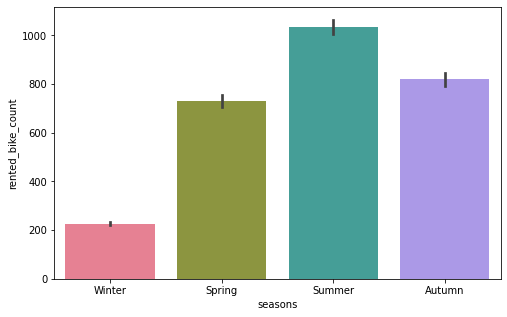

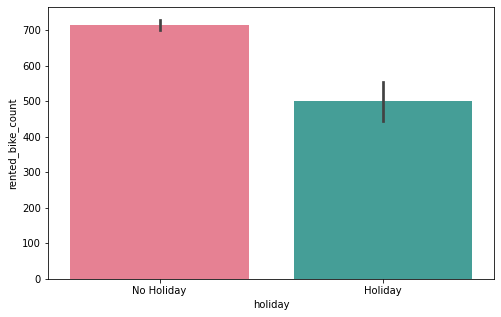

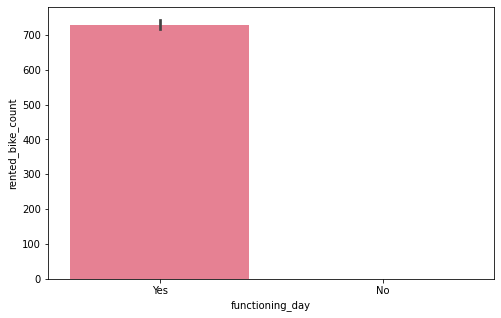

In [18]:
# CATEGORICAL BAR PLOT TOWARDS RENTED BIKE COUNT(TRAGET VARIABLE)
for i in df_cat.columns:
  plot_bar(i)

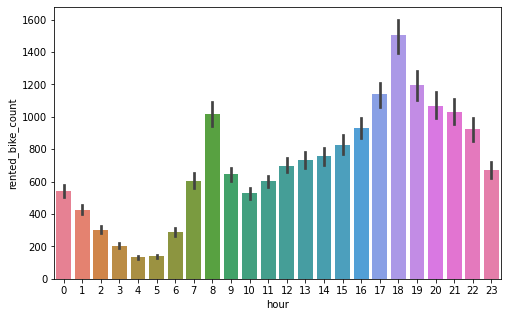

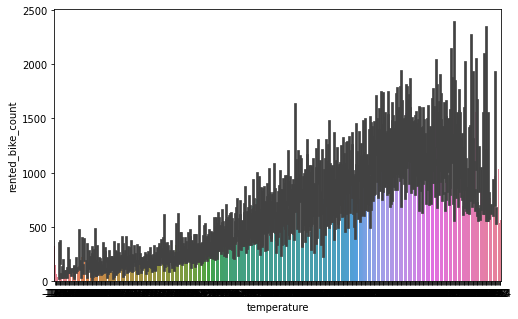

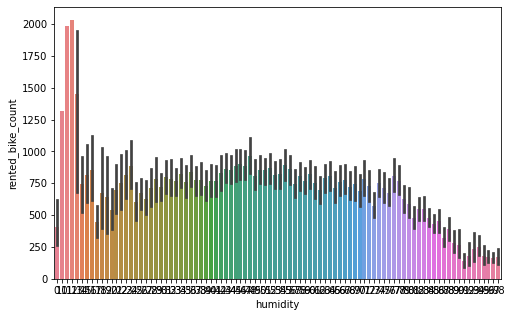

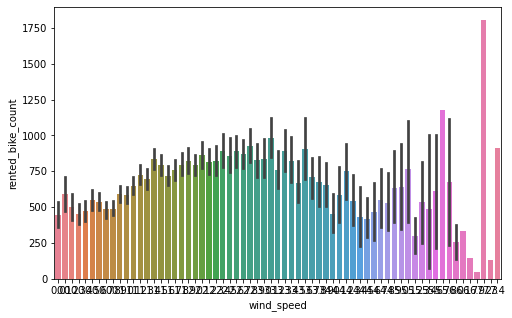

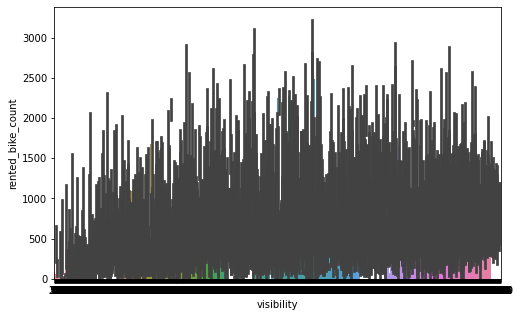

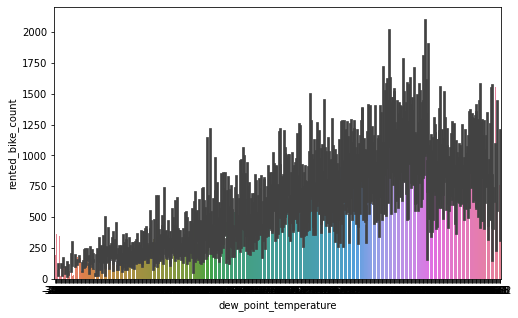

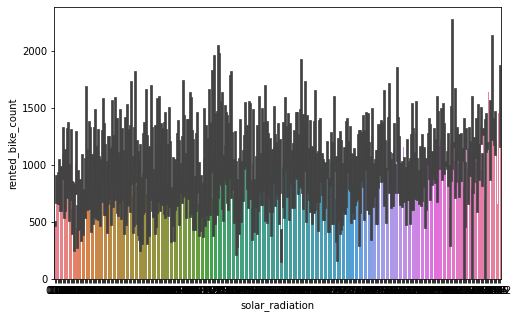

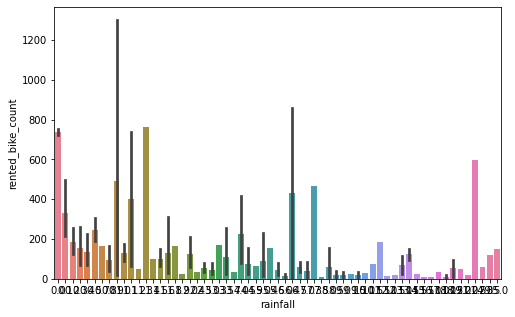

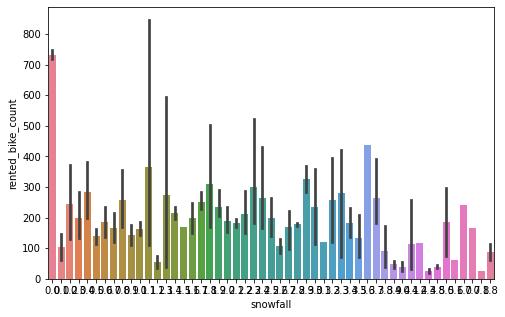

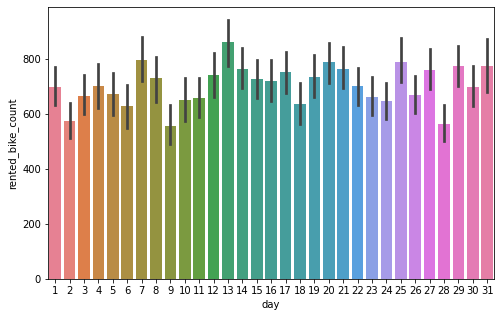

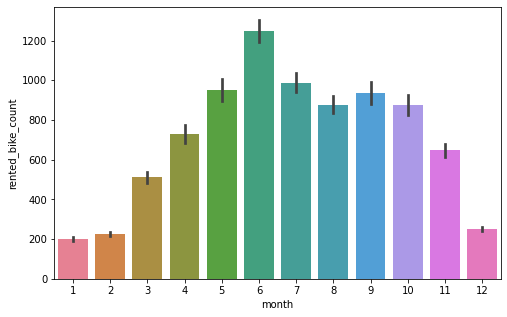

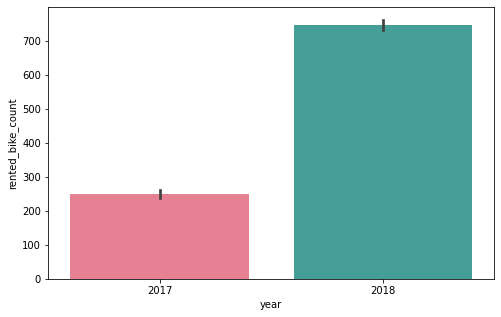

In [19]:
# NUMERICAL COLUMNS BAR PLOT TOWARDS RENTED BIKE COUNT(TRAGET VARIABLE)
for i in df.describe().columns[1:]:
  plot_bar(i)

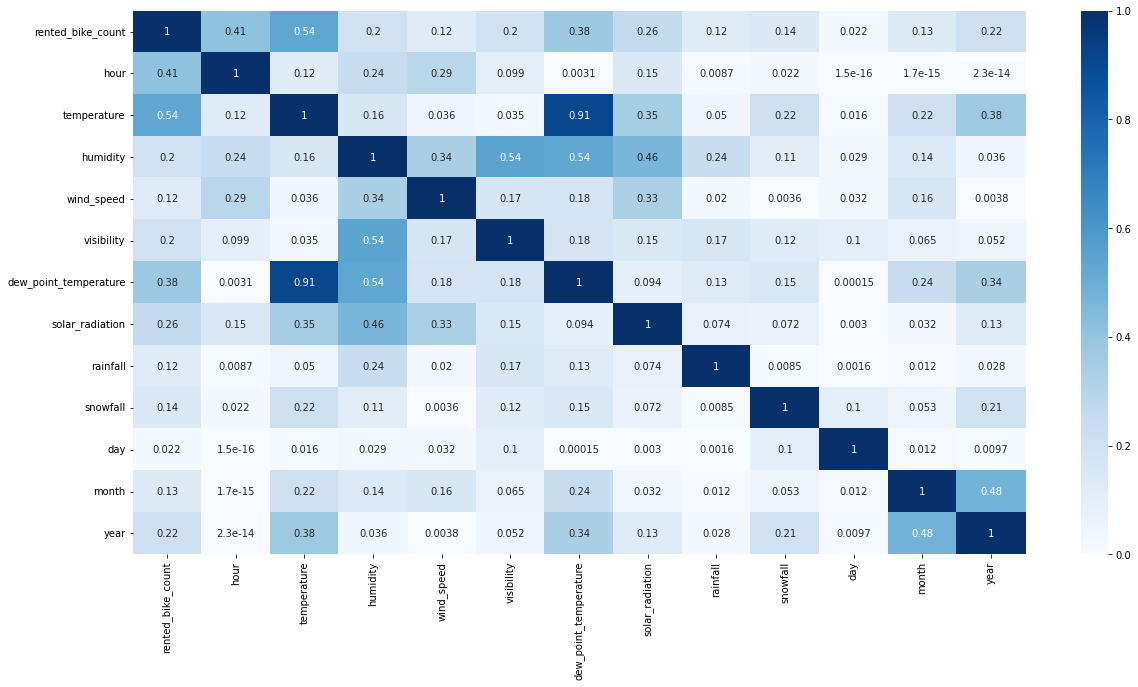

In [20]:
# CORELATION HEATMAP TO FIND OUT THE HIGHER CORELATING VARIABLES
plt.figure(figsize=(20,10))
sns.heatmap(df.corr().abs(),annot=True,cmap='Blues')
plt.show()

In [21]:
# DEFINING FUNTION TO PLOT CORELATION GRAPH OF EACH NUMERIC COLUMNS TOWARDS RENTED BIKE COUNT(TRAGET VARIABLE)
def correlation(abc):
  plt.figure(figsize = (11,5))
  sns.regplot(x=abc, y=df['rented_bike_count'],line_kws={"color": "black"})
  plt.show()

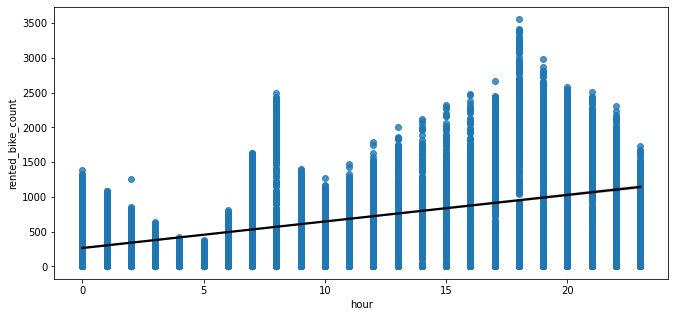

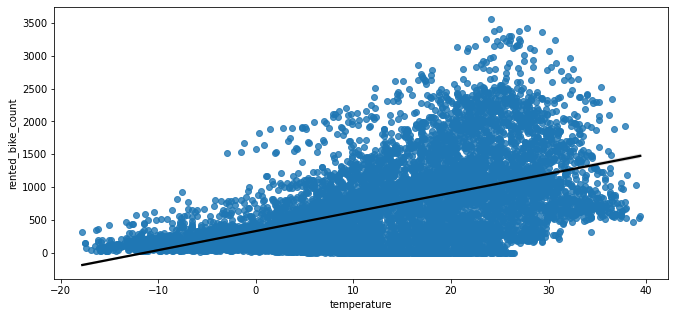

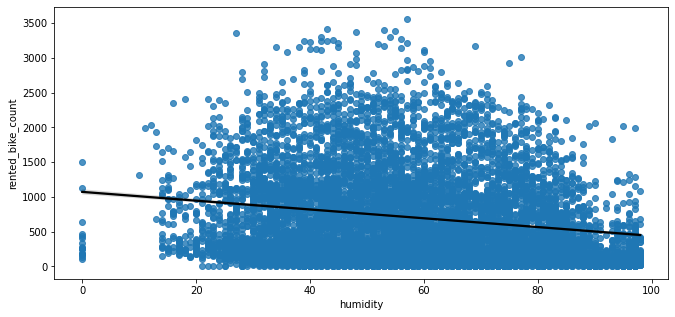

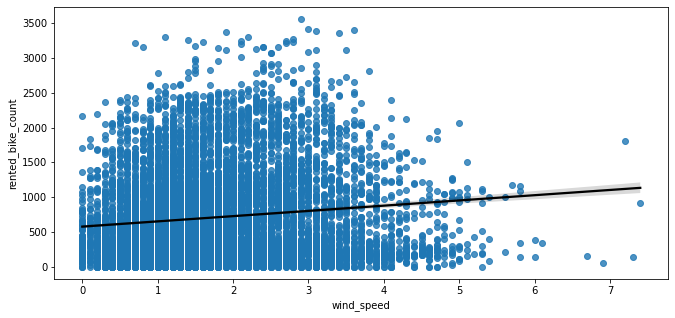

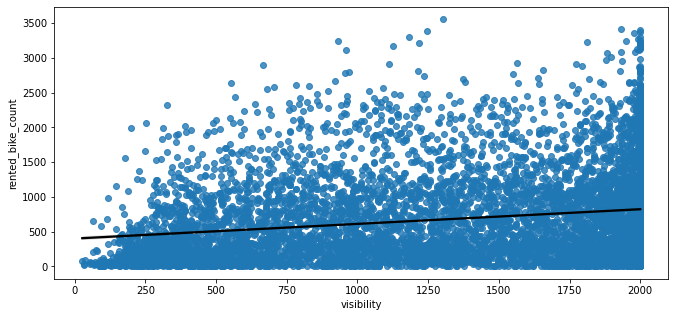

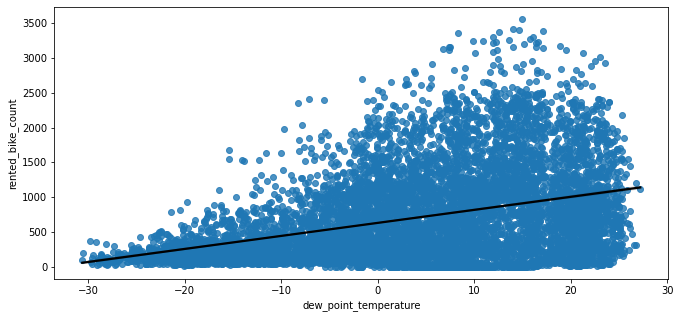

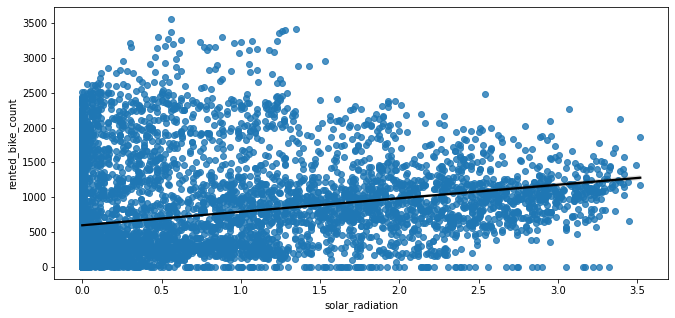

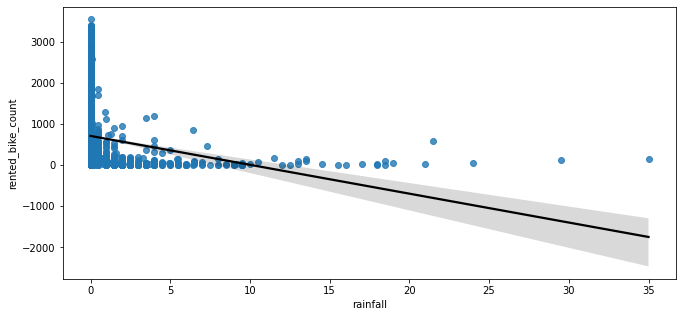

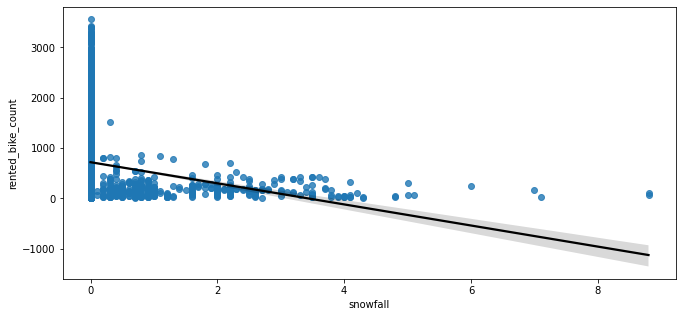

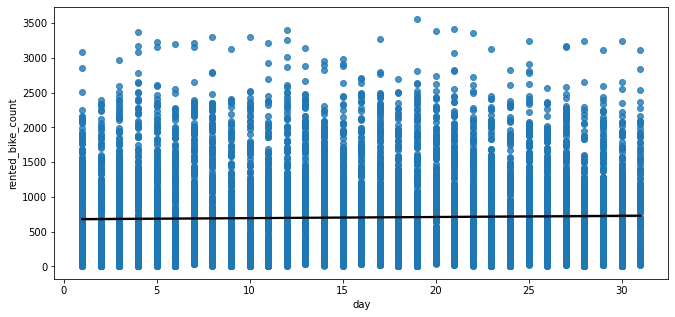

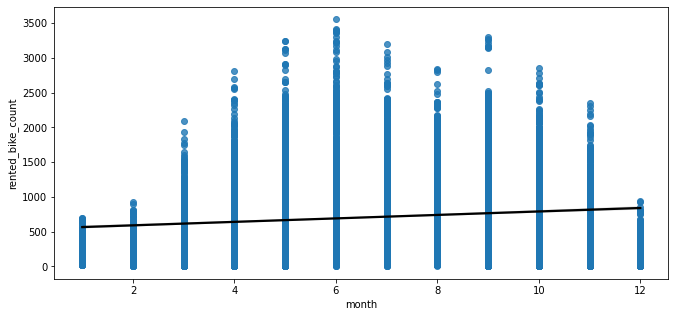

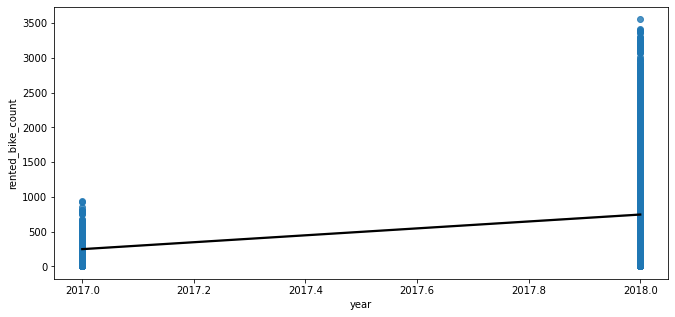

In [22]:
for i in df.describe().columns[1:]:
  correlation(df[i])

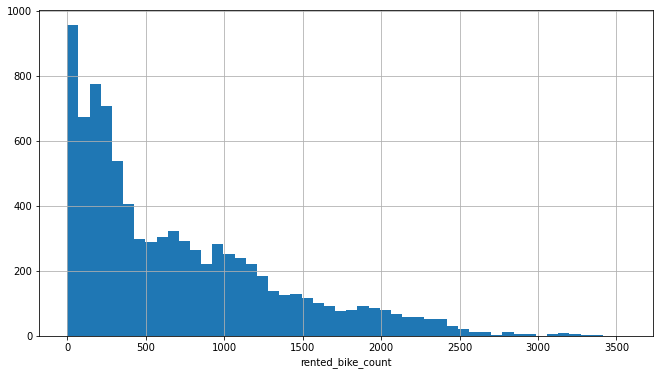

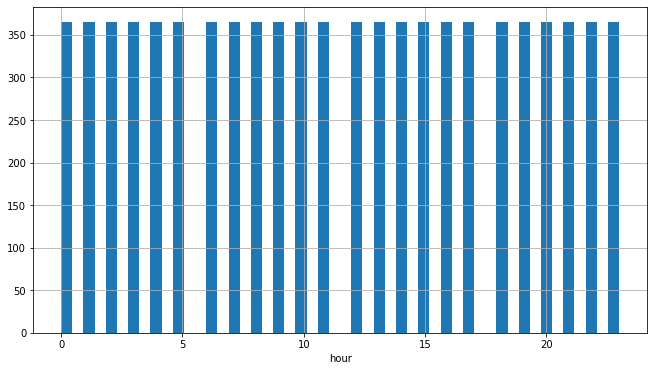

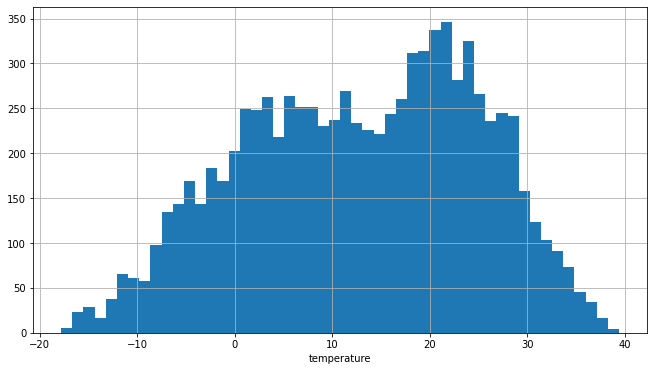

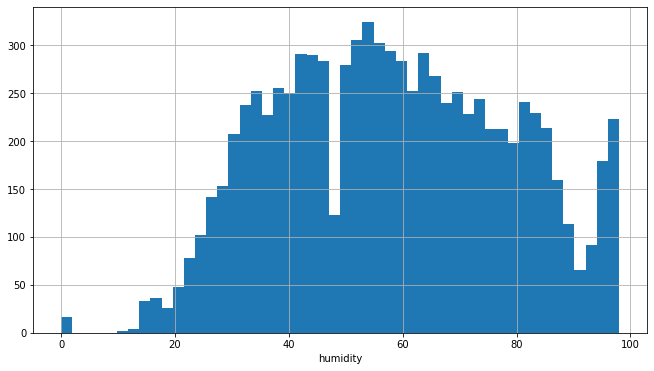

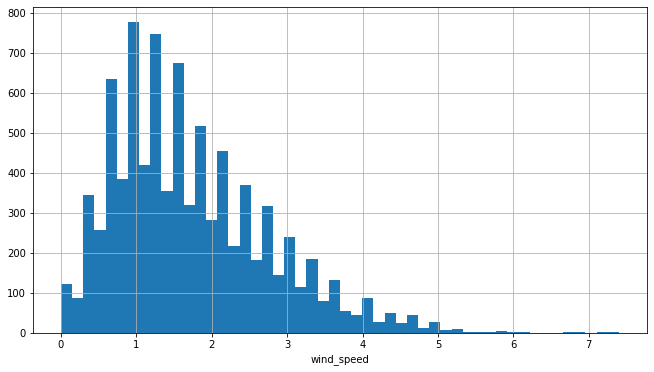

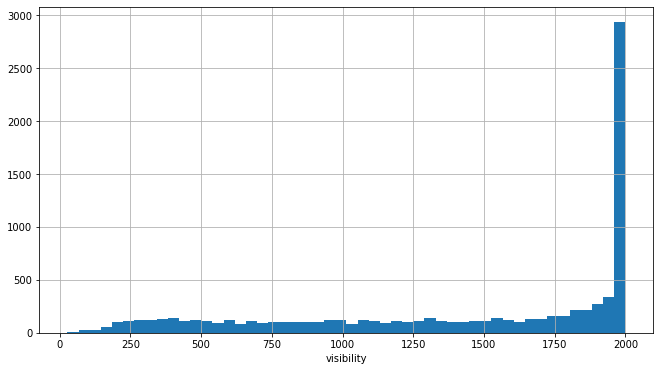

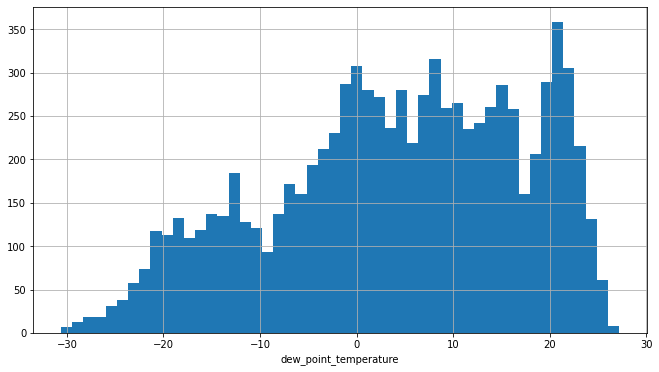

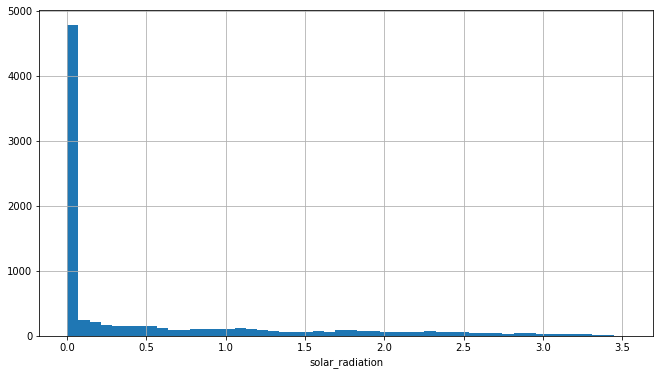

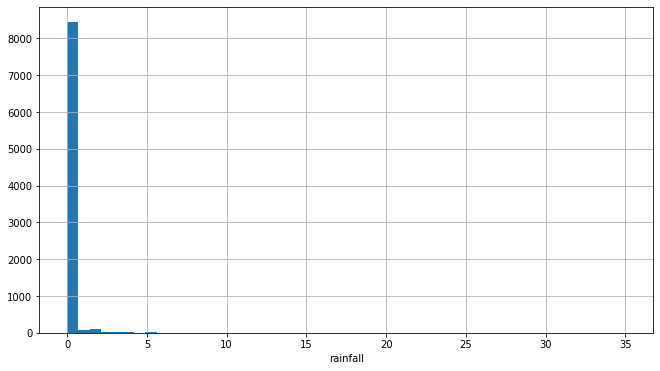

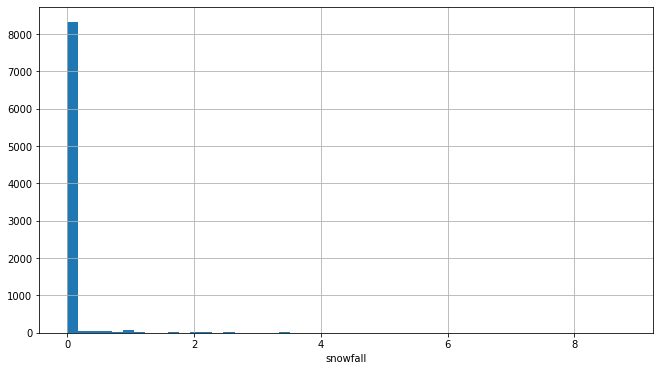

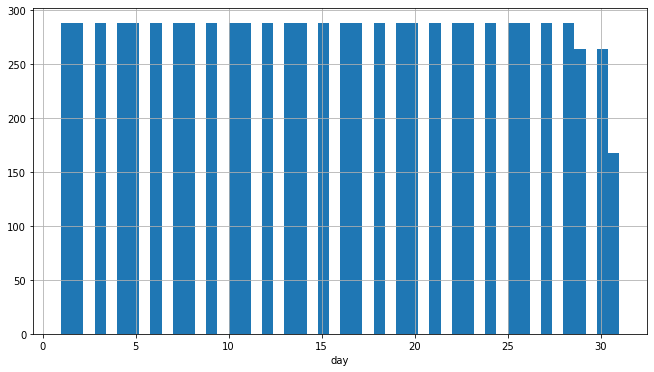

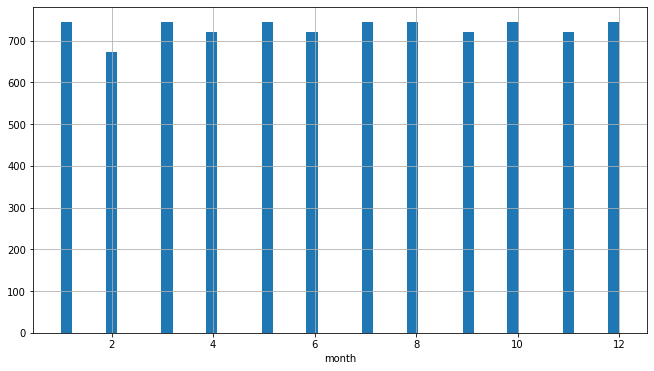

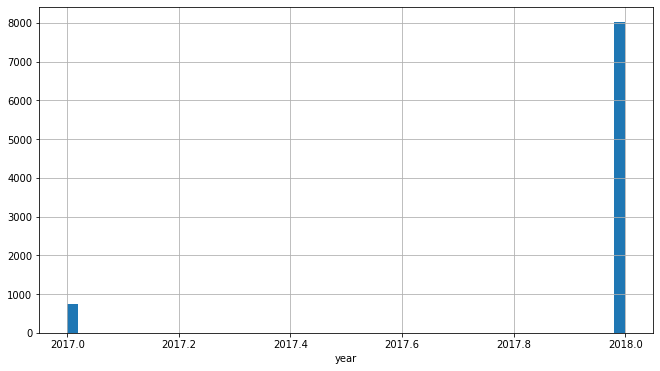

In [23]:
# DISTRIBUTION OF FEATURES
for i in df.describe().columns:
  plt.figure(figsize = (11,6))
  df[i].hist(bins = 50)
  plt.xlabel(i)
  plt.show()

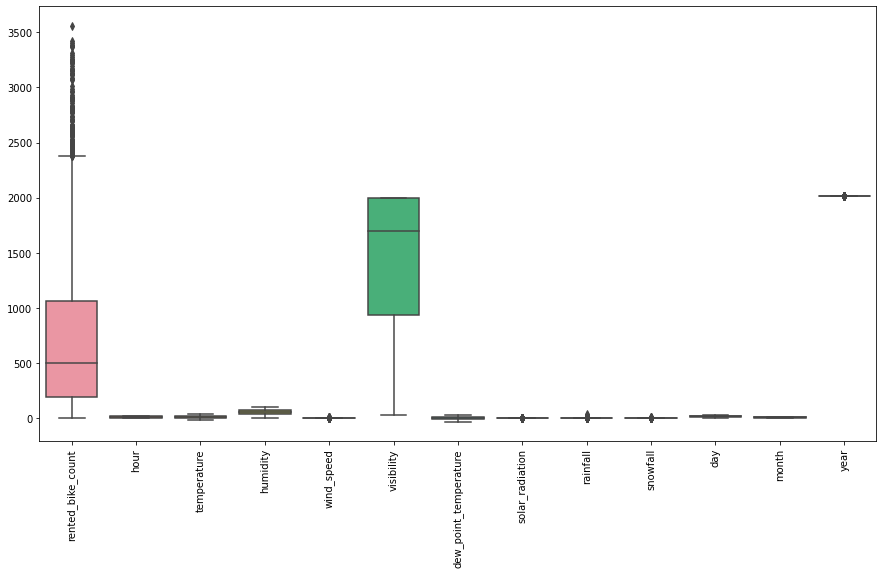

In [24]:
# BOXPLOT ON DATASET FOR SEEING THE OUTLIERS
plt.figure(figsize=(15, 8))
sns.boxplot(data = df)
plt.xticks(rotation = "vertical")
plt.show()

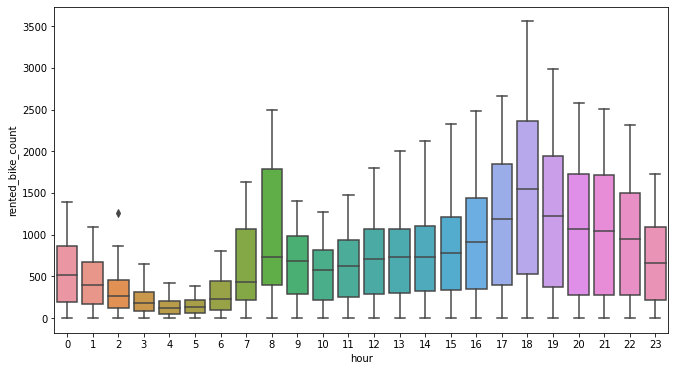

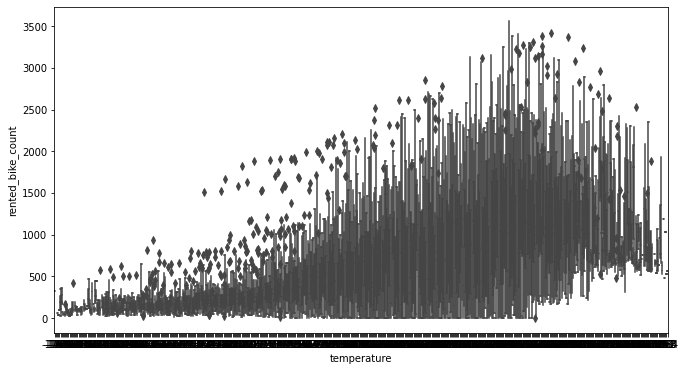

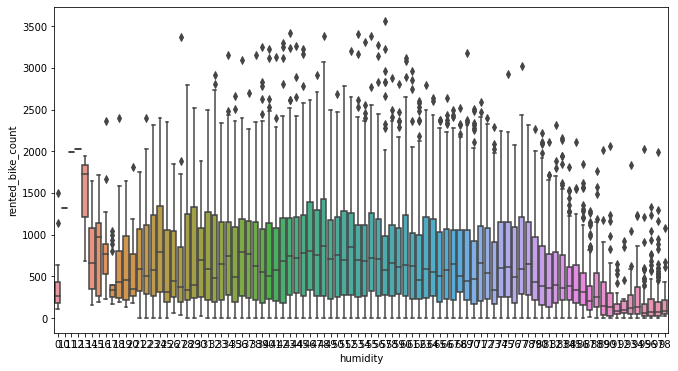

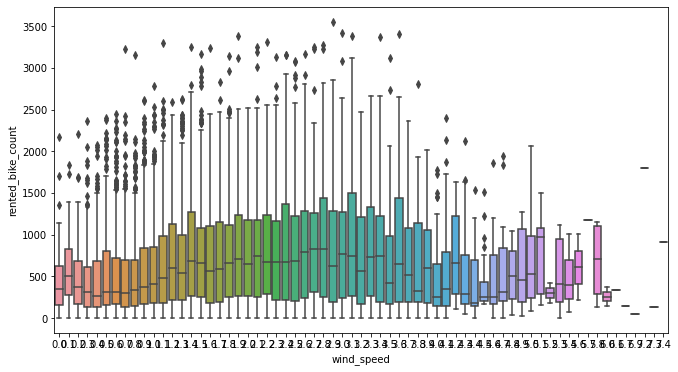

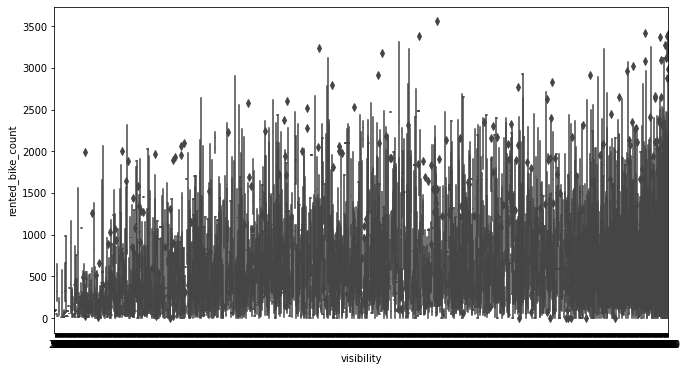

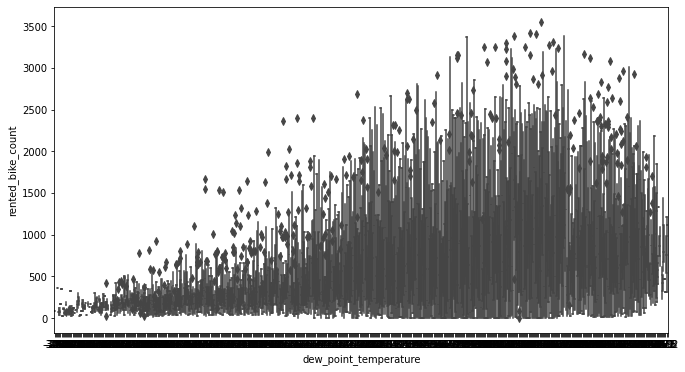

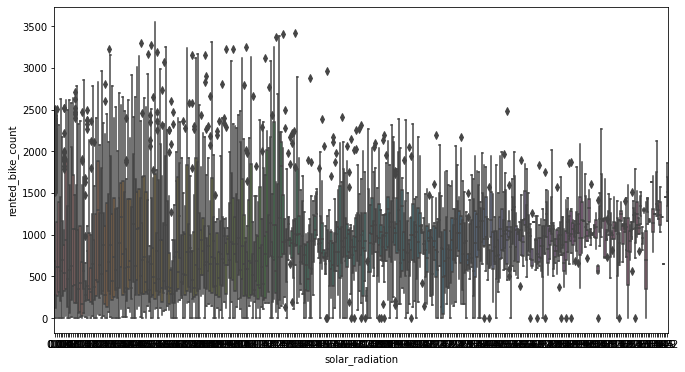

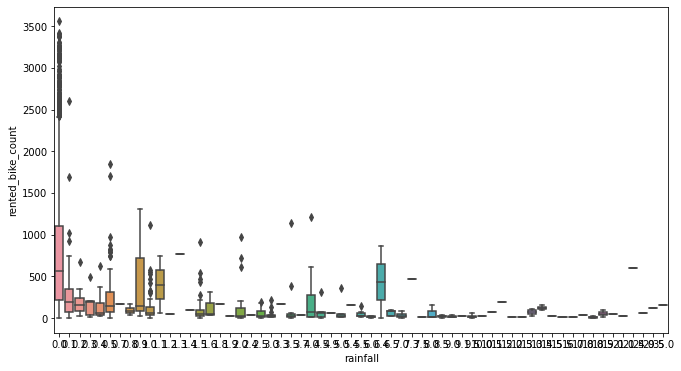

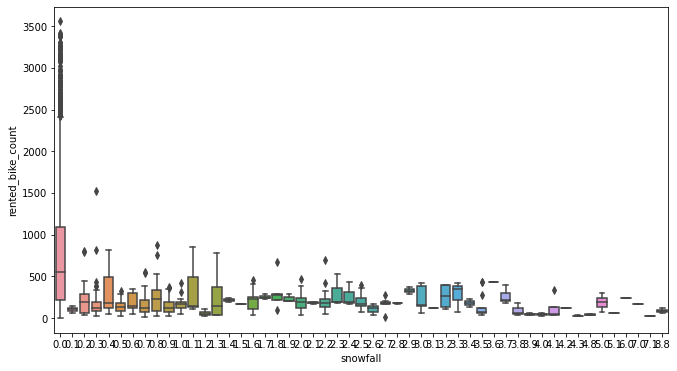

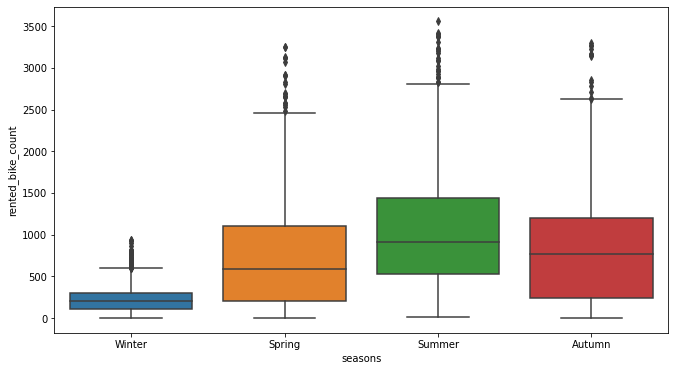

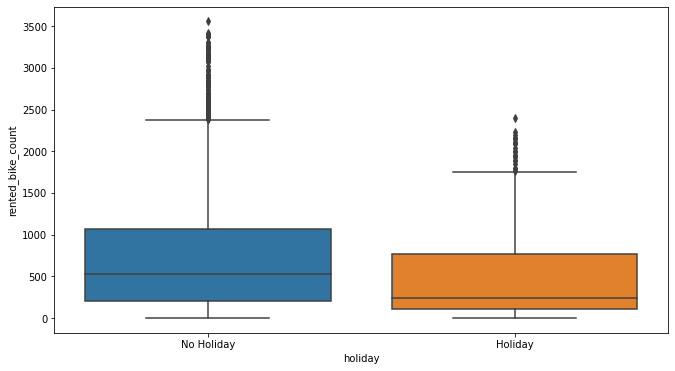

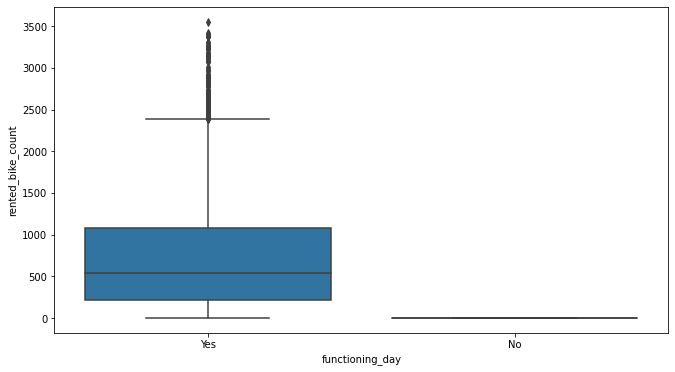

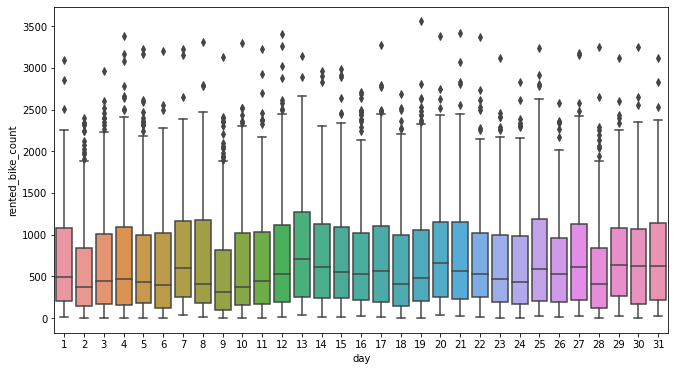

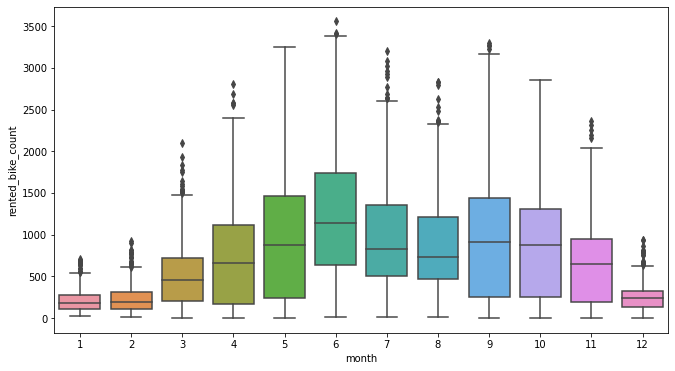

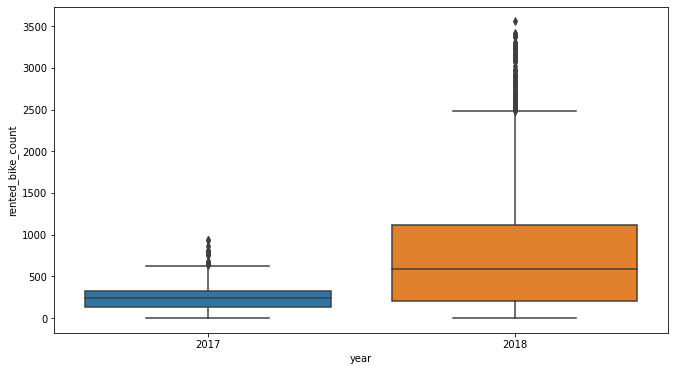

In [25]:
# PLOTING BOXPLOT TOWARDS RENTED BIKE COUNT(TRAGET VARIABLE)
for i in df.columns[1:]:
  plt.figure(figsize = (11,6))
  sns.boxplot(data = df,y = "rented_bike_count",x = i)
  plt.show()

In [26]:
df_cat.columns

Index(['seasons', 'holiday', 'functioning_day'], dtype='object')

In [27]:
# MAKING DUMMIES OF CATEGORICAL COLUMNS
dummies = pd.get_dummies(df[['seasons', 'holiday','functioning_day']], drop_first=True)

In [28]:
dummies

,seasons_Spring,seasons_Summer,seasons_Winter,holiday_No Holiday,functioning_day_Yes
0,0,0,1,1,1
1,0,0,1,1,1
2,0,0,1,1,1
3,0,0,1,1,1
4,0,0,1,1,1
...,...,...,...,...,...
8755,0,0,0,1,1
8756,0,0,0,1,1
8757,0,0,0,1,1
8758,0,0,0,1,1


In [29]:
# MERGING THE DUMMIES DATASET TO THE MAIN DATASET AS NEW_DF
new_df = pd.concat([df, dummies], axis =1)

In [30]:
new_df.T

,0,1,2,3,4,5,6,7,8,9,...,8750,8751,8752,8753,8754,8755,8756,8757,8758,8759
rented_bike_count,254,204,173,107,78,100,181,460,930,490,...,761,768,837,1047,1384,1003,764,694,712,584
hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
temperature,-5.2,-5.5,-6.0,-6.2,-6.0,-6.4,-6.6,-7.4,-7.6,-6.5,...,7.8,7.0,7.2,6.0,4.7,4.2,3.4,2.6,2.1,1.9
humidity,37,38,39,40,36,37,35,38,37,27,...,20,20,23,29,34,34,37,39,41,43
wind_speed,2.2,0.8,1.0,0.9,2.3,1.5,1.3,0.9,1.1,0.5,...,2.2,3.3,1.5,2.1,1.9,2.6,2.3,0.3,1.0,1.3
visibility,2000,2000,2000,2000,2000,2000,2000,2000,2000,1928,...,2000,1994,1945,1877,1661,1894,2000,1968,1859,1909
dew_point_temperature,-17.6,-17.6,-17.7,-17.6,-18.6,-18.7,-19.5,-19.3,-19.8,-22.4,...,-13.8,-14.4,-12.6,-10.7,-9.8,-10.3,-9.9,-9.9,-9.8,-9.3
solar_radiation,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01,0.23,...,1.67,1.21,0.72,0.23,0.0,0.0,0.0,0.0,0.0,0.0
rainfall,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
snowfall,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
df_cat.columns

Index(['seasons', 'holiday', 'functioning_day'], dtype='object')

In [32]:
# DROPING USELESS FEATURES FROM THE DATASET
new_df.drop(['dew_point_temperature', 'seasons', 'holiday', 'functioning_day'], axis=1, inplace=True)

In [33]:
new_df.columns

Index(['rented_bike_count', 'hour', 'temperature', 'humidity', 'wind_speed',
       'visibility', 'solar_radiation', 'rainfall', 'snowfall', 'day', 'month',
       'year', 'seasons_Spring', 'seasons_Summer', 'seasons_Winter',
       'holiday_No Holiday', 'functioning_day_Yes'],
      dtype='object')

In [34]:
# RENAMING COLUMNS 
new_df.columns = ['rented_bike_count', 'hour', 'temperature', 'humidity', 'wind_speed',
       'visibility', 'solar_radiation', 'rainfall', 'snowfall', 'day', 'month',
       'year', 'seasons_Spring', 'seasons_Summer', 'seasons_Winter',
       'holiday', 'function_day']

In [35]:
# INDEPENDENT VARIBLES
X = new_df.iloc[:,1:]

In [36]:
# DEPENDED VARIBLE(TRAGET VARIBLE)
Y = new_df["rented_bike_count"]

In [37]:
# IMPORTING ML ALGORITHM FOR THE MODEL

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge


# SPLITTING THE X AND Y INTO X_TRAIN , X_TEST , Y_TRAIN , Y_TEST
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 5)

LINEAR REGRESSION



In [38]:
# TRAINING THE MODEl
reg = LinearRegression()
reg.fit(X_train, Y_train)

LinearRegression()

In [39]:
# INTERCEPT AND COFFIENT 
reg.intercept_ , reg.coef_

(1345705.617822332,
 array([ 2.70207808e+01,  2.68026164e+01, -8.68211625e+00,  2.08811341e+01,
         6.31780845e-03, -8.95325103e+01, -5.68074528e+01,  3.62253725e+01,
        -1.57130550e+00, -5.47507590e+01, -6.66695302e+02, -4.71220691e+02,
        -3.06028559e+02, -8.70699131e+02,  1.17113530e+02,  9.07156536e+02]))

In [40]:
# PREDICTING X_TEST
y_pred=reg.predict(X_test)

In [41]:
# IMPOERTING SKLEARN METRICS FOR EVALUTING THE MODDEL SCORES
from sklearn.metrics import r2_score,mean_squared_error

In [42]:
# R-SQUARED
r2_score(Y_test, y_pred)

0.5573770262170219

In [43]:
# MODEL FITIING ON TEST DATASET
reg.score(X_test, Y_test)

0.5573770262170219

In [44]:
# MODEL FITTING ON TRAIN DATASET
reg.score(X_train, Y_train)

0.5518544224178705

In [45]:
# ADJUSTED R-SQURED , MEAN SQUARED ERROR, ROOT MEAN SQUARED ERROR
print("Adjusted R2 : ",1-(1-r2_score((Y_test), (y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
MSE  = mean_squared_error(Y_test, y_pred)
print("MSE :" , MSE)
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

Adjusted R2 :  0.554117952318942
MSE : 181118.6145432901
RMSE : 425.5803267813141


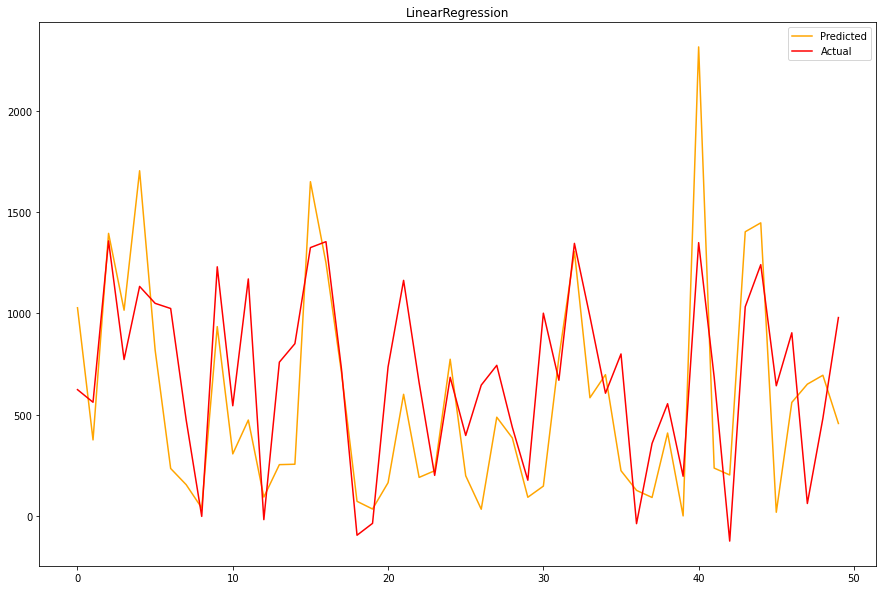

In [46]:
# PLOTTING FIRST 50 Y_TEST AND Y_PRED
plt.figure(figsize=(15,10))
plt.plot(np.array(Y_test[:50]), color = "orange")
plt.plot(y_pred[:50], color = "red")
plt.title("LinearRegression")
plt.legend(["Predicted","Actual"])
plt.show()

LASSO REGRESSION

In [47]:
# IMPORTING ML ALGORITHM FOR THE MODEL AND GRIDSEARCH CV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

In [48]:
# PERFORMING HYPERPARAMETER TUNNING AND FITTING THE TRAIN DATASET 
rf_grid = GridSearchCV(Lasso(),
                       param_grid = {"alpha" : [1.1,0.001]},
                       cv = 5, verbose=2, scoring='roc_auc')

rf_grid.fit(X_train,Y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] END ..........................................alpha=1.1; total time=   0.0s
[CV] END ..........................................alpha=1.1; total time=   0.0s
[CV] END ..........................................alpha=1.1; total time=   0.0s
[CV] END ..........................................alpha=1.1; total time=   0.0s
[CV] END ..........................................alpha=1.1; total time=   0.1s
[CV] END ........................................alpha=0.001; total time=   0.1s
[CV] END ........................................alpha=0.001; total time=   0.1s
[CV] END ........................................alpha=0.001; total time=   0.1s
[CV] END ........................................alpha=0.001; total time=   0.1s
[CV] END ........................................alpha=0.001; total time=   0.1s


GridSearchCV(cv=5, estimator=Lasso(), param_grid={'alpha': [1.1, 0.001]},
             scoring='roc_auc', verbose=2)

In [49]:
# BEST HYPERPARAMETER
rf_grid.best_params_

{'alpha': 1.1}

In [50]:
# FITTING THE MODEL WITH BEST HYPERPARAMETER
lasso = Lasso(alpha=1.1)
lasso.fit(X_train, Y_train)

Lasso(alpha=1.1)

In [51]:
# COFFICENT
lasso.coef_

array([ 2.73304847e+01,  2.59275070e+01, -8.41645631e+00,  1.77838359e+01,
        1.01449087e-02, -8.15877296e+01, -5.72252304e+01,  2.70629336e+01,
       -1.33847758e+00,  1.20573844e+00, -5.07888443e+01, -1.12582700e+02,
       -1.06986163e+02, -3.68740392e+02,  8.88997620e+01,  8.58483975e+02])

In [52]:
# INTERCEPT
lasso.intercept_

102287.63487918161

In [53]:
# PRECDICTING X_TEST
y_pred = lasso.predict(X_test)

In [54]:
# R_SQUARED
r2_score (Y_test, y_pred)

0.5589945870750749

In [55]:
#  MODEL FITIING ON TEST DATASET
lasso.score(X_test, Y_test)

0.5589945870750749

In [56]:
# MODEL FITIING ON TRAIN DATASET
lasso.score(X_train, Y_train)

0.547331619947321

In [57]:
# ADJUSTED R-SQURED , MEAN SQUARED ERROR, ROOT MEAN SQUARED ERROR
print("Adjusted R2 : ",1-(1-r2_score((Y_test), (y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
MSE  = mean_squared_error(Y_test, y_pred)
print("MSE :" , MSE)
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

Adjusted R2 :  0.5557474234272153
MSE : 180456.71853042376
RMSE : 424.8019756668085


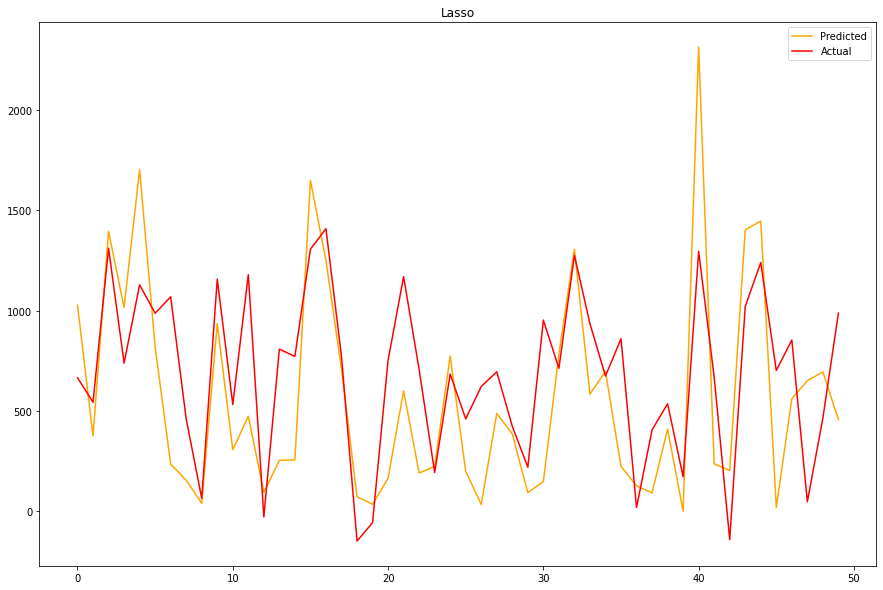

In [58]:
# PLOTTING FIRST 50 Y_TEST AND Y_PRED
plt.figure(figsize=(15,10))
plt.plot(np.array(Y_test[:50]), color = "orange")
plt.plot(y_pred[:50], color = "red")
plt.title("Lasso")
plt.legend(["Predicted","Actual"])
plt.show()

RIDG REGRESSION

In [59]:
# PERFORMING HYPERPARAMETER TUNNING AND FITTING THE TRAIN DATASET 
rf_grid = GridSearchCV(Ridge(),
                       param_grid = {"alpha" : [0,0.0000000001]},
                       cv = 5, verbose=2, scoring='roc_auc')

rf_grid.fit(X_train,Y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] END ............................................alpha=0; total time=   0.0s
[CV] END ............................................alpha=0; total time=   0.0s
[CV] END ............................................alpha=0; total time=   0.0s
[CV] END ............................................alpha=0; total time=   0.0s
[CV] END ............................................alpha=0; total time=   0.0s
[CV] END ........................................alpha=1e-10; total time=   0.0s
[CV] END ........................................alpha=1e-10; total time=   0.0s
[CV] END ........................................alpha=1e-10; total time=   0.0s
[CV] END ........................................alpha=1e-10; total time=   0.0s
[CV] END ........................................alpha=1e-10; total time=   0.0s


GridSearchCV(cv=5, estimator=Ridge(), param_grid={'alpha': [0, 1e-10]},
             scoring='roc_auc', verbose=2)

In [60]:
# BEST HYPERPARAMETER
rf_grid.best_params_

{'alpha': 0}

In [61]:
# FITTING THE MODEL WITH BEST HYPERPARAMETER
ridge = Ridge(alpha=0)
ridge.fit(X_train,Y_train)

Ridge(alpha=0)

In [62]:
# PREDICTING X_TEST
y_pred = ridge.predict(X_test)

In [63]:
# COFFIENT
ridge.coef_

array([ 2.70207808e+01,  2.68026164e+01, -8.68211625e+00,  2.08811341e+01,
        6.31780845e-03, -8.95325103e+01, -5.68074528e+01,  3.62253725e+01,
       -1.57130550e+00, -5.47507590e+01, -6.66695302e+02, -4.71220691e+02,
       -3.06028559e+02, -8.70699131e+02,  1.17113530e+02,  9.07156536e+02])

In [64]:
# INTERCEPT
ridge.intercept_

1345705.6178226885

In [65]:
#  MODEL FITIING ON TEST DATASET
ridge.score(X_test, Y_test)

0.5573770262170249

In [66]:
#  MODEL FITIING ON TRAIN DATASET
ridge.score(X_train, Y_train)

0.551854422417872

In [67]:
# R_SQUARED
r2_score(Y_test, y_pred )

0.5573770262170249

In [68]:
# ADJUSTED R-SQURED , MEAN SQUARED ERROR, ROOT MEAN SQUARED ERROR
print("Adjusted R2 : ",1-(1-r2_score((Y_test), (y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
MSE  = mean_squared_error(Y_test, y_pred)
print("MSE :" , MSE)
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

Adjusted R2 :  0.554117952318945
MSE : 181118.61454328892
RMSE : 425.5803267813127


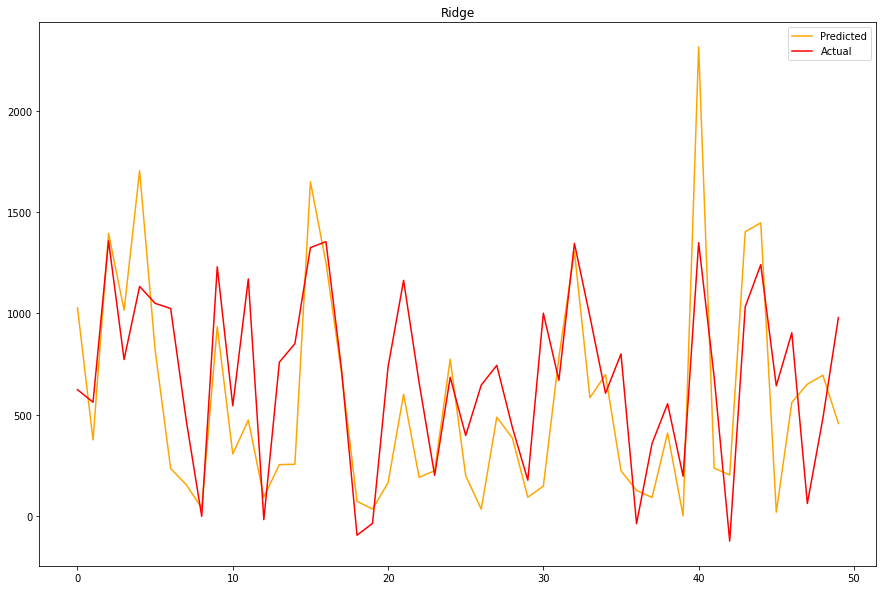

In [69]:
# PLOTTING FIRST 50 Y_TEST AND Y_PRED
plt.figure(figsize=(15,10))
plt.plot(np.array(Y_test[:50]), color = "orange")
plt.plot(y_pred[:50], color = "red")
plt.title("Ridge")
plt.legend(["Predicted","Actual"])
plt.show()

ELASTIC NET

In [70]:
# IMPORTING ELASTIC NET
from sklearn.linear_model import ElasticNet

In [71]:
# PERFORMING HYPERPARAMETER TUNNING AND FITTING THE TRAIN DATASET 
rf_grid = GridSearchCV(ElasticNet(),
                       param_grid = {"alpha" : [0,1] , 'l1_ratio' : [0.99, 0.999]},
                       cv = 5, verbose=2, scoring='roc_auc')

rf_grid.fit(X_train,Y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END .............................alpha=0, l1_ratio=0.99; total time=   0.2s
[CV] END .............................alpha=0, l1_ratio=0.99; total time=   0.2s
[CV] END .............................alpha=0, l1_ratio=0.99; total time=   0.2s
[CV] END .............................alpha=0, l1_ratio=0.99; total time=   0.2s
[CV] END .............................alpha=0, l1_ratio=0.99; total time=   0.1s
[CV] END ............................alpha=0, l1_ratio=0.999; total time=   0.1s
[CV] END ............................alpha=0, l1_ratio=0.999; total time=   0.1s
[CV] END ............................alpha=0, l1_ratio=0.999; total time=   0.1s
[CV] END ............................alpha=0, l1_ratio=0.999; total time=   0.1s
[CV] END ............................alpha=0, l1_ratio=0.999; total time=   0.1s
[CV] END .............................alpha=1, l1_ratio=0.99; total time=   0.0s
[CV] END .............................alpha=1, l1

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0, 1], 'l1_ratio': [0.99, 0.999]},
             scoring='roc_auc', verbose=2)

In [72]:
# BEST HYPER PARAMETER
rf_grid.best_params_

{'alpha': 0, 'l1_ratio': 0.99}

In [73]:
# USING BEST HYPER PARAMENTER OM THE MODEL
eln = ElasticNet(alpha= 0, l1_ratio= 0.99)

In [74]:
# FITTING TRAIN DATA SET TO THE MODEL
eln.fit(X_train, Y_train)

ElasticNet(alpha=0, l1_ratio=0.99)

In [75]:
# PREDICTING X_TEST
y_pred = eln.predict(X_test)

In [76]:
# R_SQUARED
r2_score(Y_test, y_pred)

0.5573770262171962

In [77]:
#  MODEL FITIING ON TEST DATASET
eln.score(X_test, Y_test)

0.5573770262171962

In [78]:
#  MODEL FITIING ON TRAIN DATASET
eln.score(X_train, Y_train)

0.5518544224178756

In [79]:
# ADJUSTED R-SQURED , MEAN SQUARED ERROR, ROOT MEAN SQUARED ERROR
print("Adjusted R2 : ",1-(1-r2_score((Y_test), (y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
MSE  = mean_squared_error(Y_test, y_pred)
print("MSE :" , MSE)
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

Adjusted R2 :  0.5541179523191175
MSE : 181118.6145432188
RMSE : 425.5803267812303


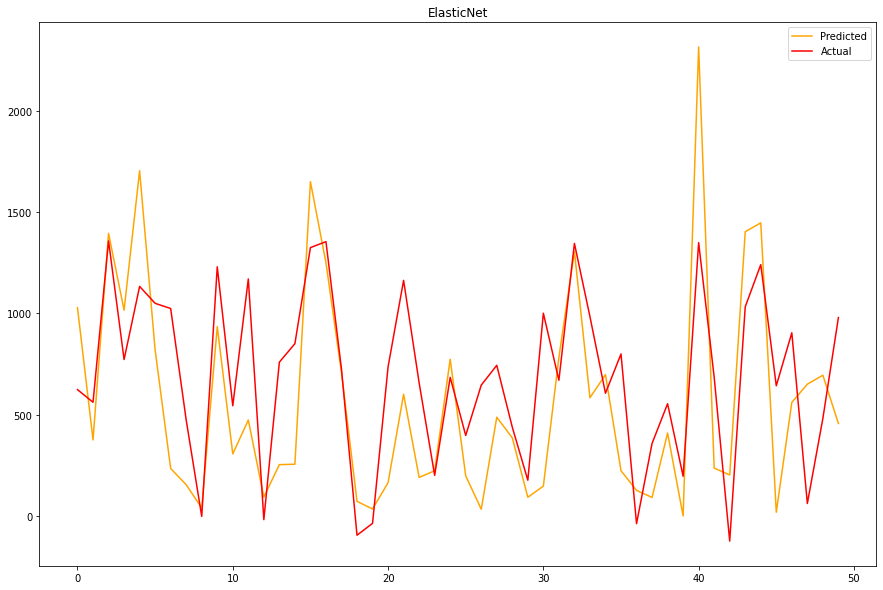

In [80]:
# PLOTTING FIRST 50 Y_TEST AND Y_PRED
plt.figure(figsize=(15,10))
plt.plot(np.array(Y_test[:50]), color = "orange")
plt.plot(y_pred[:50], color = "red")
plt.title("ElasticNet")
plt.legend(["Predicted","Actual"])
plt.show()

DESION TREE

In [81]:
# IMPOERTING DESISION TREE REGRESSOR
from sklearn.tree import DecisionTreeRegressor

In [82]:
# PERFORMING HYPERPARAMETER TUNNING AND FITTING THE TRAIN DATASET 
rf_grid = GridSearchCV(DecisionTreeRegressor(),
                       param_grid = {'max_depth' :[ i for i in range(8,11)], 'min_samples_split' :[ i for i in range(8,11)], 'min_samples_leaf': [i for i in range(6,11)]},
                       cv = 5, verbose=2, scoring='roc_auc')

rf_grid.fit(X_train,Y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits
[CV] END max_depth=8, min_samples_leaf=6, min_samples_split=8; total time=   0.0s
[CV] END max_depth=8, min_samples_leaf=6, min_samples_split=8; total time=   0.0s
[CV] END max_depth=8, min_samples_leaf=6, min_samples_split=8; total time=   0.0s
[CV] END max_depth=8, min_samples_leaf=6, min_samples_split=8; total time=   0.0s
[CV] END max_depth=8, min_samples_leaf=6, min_samples_split=8; total time=   0.0s
[CV] END max_depth=8, min_samples_leaf=6, min_samples_split=9; total time=   0.0s
[CV] END max_depth=8, min_samples_leaf=6, min_samples_split=9; total time=   0.0s
[CV] END max_depth=8, min_samples_leaf=6, min_samples_split=9; total time=   0.0s
[CV] END max_depth=8, min_samples_leaf=6, min_samples_split=9; total time=   0.0s
[CV] END max_depth=8, min_samples_leaf=6, min_samples_split=9; total time=   0.0s
[CV] END max_depth=8, min_samples_leaf=6, min_samples_split=10; total time=   0.0s
[CV] END max_depth=8, min_samples_l

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [8, 9, 10],
                         'min_samples_leaf': [6, 7, 8, 9, 10],
                         'min_samples_split': [8, 9, 10]},
             scoring='roc_auc', verbose=2)

In [83]:
# BEST HYPER PARAMETER
rf_grid.best_params_

{'max_depth': 8, 'min_samples_leaf': 6, 'min_samples_split': 8}

In [84]:
# USING BEST HYPER PARAMENTER OM THE MODEL
t = DecisionTreeRegressor(max_depth = 8, min_samples_split = 8, min_samples_leaf = 6)

In [85]:
#  MODEL FITIING ON TRAIN DATASET
t.fit(X_train, Y_train)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=6, min_samples_split=8)

In [86]:
# PREDICTING X_TEST
y_pred = t.predict(X_test)

In [87]:
# R_SQUARED
r2_score(Y_test, y_pred)

0.802234540384112

In [88]:
#  MODEL FITIING ON TEST DATASET
t.score(X_test, Y_test)

0.802234540384112

In [89]:
#  MODEL FITIING ON TRAIN DATASET
t.score(X_train, Y_train)

0.8300829783880412

In [90]:
# ADJUSTED R-SQURED , MEAN SQUARED ERROR, ROOT MEAN SQUARED ERROR
print("Adjusted R2 : ",1-(1-r2_score((Y_test), (y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
MSE  = mean_squared_error(Y_test, y_pred)
print("MSE :" , MSE)
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

Adjusted R2 :  0.8007783750118828
MSE : 80924.41687789347
RMSE : 284.47217241391724


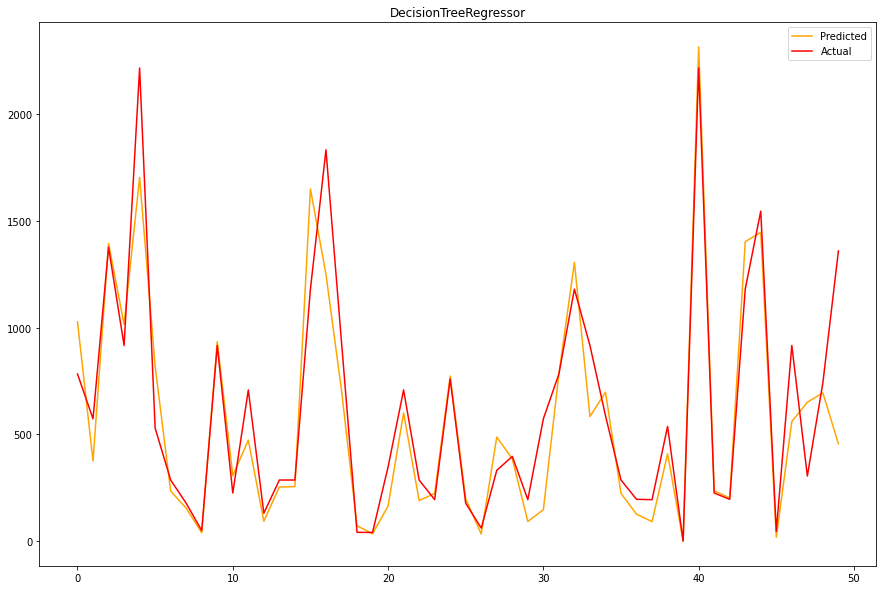

In [91]:
# PLOTTING FIRST 50 Y_TEST AND Y_PRED
plt.figure(figsize=(15,10))
plt.plot(np.array(Y_test[:50]), color = "orange")
plt.plot(y_pred[:50], color = "red")
plt.title("DecisionTreeRegressor")
plt.legend(["Predicted","Actual"])
plt.show()

RandomForest

In [92]:
# IMPORTING RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

In [93]:
# PERFORMING HYPERPARAMETER TUNNING AND FITTING THE TRAIN DATASET 
rf_grid = GridSearchCV( RandomForestRegressor(),
                       param_grid = {'max_depth' : [18,19,20], 'min_samples_split' : [7,8,9], 'min_samples_leaf' : [7,6,8]},
                       cv = 5, verbose=2, scoring='roc_auc')

rf_grid.fit(X_train,Y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END max_depth=18, min_samples_leaf=7, min_samples_split=7; total time=   2.2s
[CV] END max_depth=18, min_samples_leaf=7, min_samples_split=7; total time=   1.7s
[CV] END max_depth=18, min_samples_leaf=7, min_samples_split=7; total time=   1.7s
[CV] END max_depth=18, min_samples_leaf=7, min_samples_split=7; total time=   1.7s
[CV] END max_depth=18, min_samples_leaf=7, min_samples_split=7; total time=   2.0s
[CV] END max_depth=18, min_samples_leaf=7, min_samples_split=8; total time=   2.4s
[CV] END max_depth=18, min_samples_leaf=7, min_samples_split=8; total time=   2.3s
[CV] END max_depth=18, min_samples_leaf=7, min_samples_split=8; total time=   2.2s
[CV] END max_depth=18, min_samples_leaf=7, min_samples_split=8; total time=   2.3s
[CV] END max_depth=18, min_samples_leaf=7, min_samples_split=8; total time=   2.4s
[CV] END max_depth=18, min_samples_leaf=7, min_samples_split=9; total time=   2.4s
[CV] END max_depth=18, mi

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [18, 19, 20],
                         'min_samples_leaf': [7, 6, 8],
                         'min_samples_split': [7, 8, 9]},
             scoring='roc_auc', verbose=2)

In [94]:
# BEST HYPER PARAMETER
rf_grid.best_params_

{'max_depth': 18, 'min_samples_leaf': 7, 'min_samples_split': 7}

In [95]:
# USING BEST HYPER PARAMENTER OM THE MODEL
rfr = RandomForestRegressor(max_depth = 18, min_samples_split = 7, min_samples_leaf = 7)

In [96]:
#  MODEL FITIING ON TRAIN DATASET
rfr.fit(X_train, Y_train)

RandomForestRegressor(max_depth=18, min_samples_leaf=7, min_samples_split=7)

In [97]:
# PREDICTING X_TEST
y_pred = rfr.predict(X_test)

In [98]:
#  MODEL FITIING ON TRAIN DATASET
rfr.score(X_train, Y_train)

0.9267497903592081

In [99]:
# #  MODEL FITIING ON TEST DATASET
rfr.score(X_test, Y_test)

0.8730178795569363

In [100]:
# R_SQUARED
r2_score(Y_test , y_pred)

0.8730178795569363

In [101]:
# ADJUSTED R-SQURED , MEAN SQUARED ERROR, ROOT MEAN SQUARED ERROR
print("Adjusted R2 : ",1-(1-r2_score((Y_test), (y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
MSE  = mean_squared_error(Y_test, y_pred)
print("MSE :" , MSE)
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

Adjusted R2 :  0.872082898458414
MSE : 51960.307278793494
RMSE : 227.94803635652028


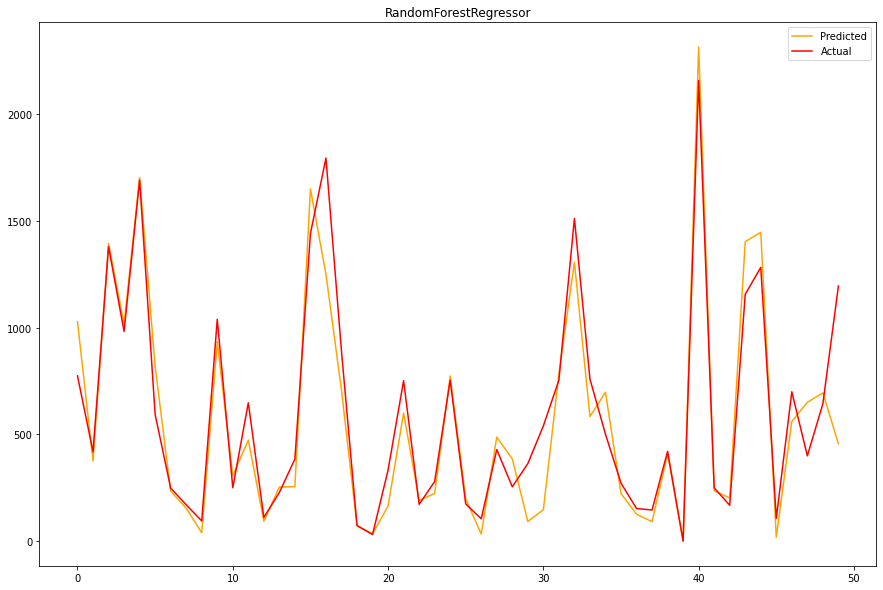

In [102]:
# PLOTTING FIRST 50 Y_TEST AND Y_PRED
plt.figure(figsize=(15,10))
plt.plot(np.array(Y_test[:50]), color = "orange")
plt.plot(y_pred[:50], color = "red")
plt.title("RandomForestRegressor")
plt.legend(["Predicted","Actual"])
plt.show()

ADA BOOSTIKNG

In [103]:
# IMPORTING AdaBoostRegressor
from sklearn.ensemble import AdaBoostRegressor

In [104]:
# PERFORMING HYPERPARAMETER TUNNING
rf_grid = GridSearchCV( AdaBoostRegressor(),
                       param_grid = { 'n_estimators' :[50, 60], 'learning_rate' : [1.0,0.75], 'loss' :['linear', 'square' , 'exponential'], "random_state" : [0,1,2]}, cv=3
                       , verbose=2, scoring='roc_auc')


In [105]:
# FITTING THE TRAIN DATASET 
rf_grid.fit(X_train,Y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] END learning_rate=1.0, loss=linear, n_estimators=50, random_state=0; total time=   0.4s
[CV] END learning_rate=1.0, loss=linear, n_estimators=50, random_state=0; total time=   0.4s
[CV] END learning_rate=1.0, loss=linear, n_estimators=50, random_state=0; total time=   0.4s
[CV] END learning_rate=1.0, loss=linear, n_estimators=50, random_state=1; total time=   0.4s
[CV] END learning_rate=1.0, loss=linear, n_estimators=50, random_state=1; total time=   0.4s
[CV] END learning_rate=1.0, loss=linear, n_estimators=50, random_state=1; total time=   0.4s
[CV] END learning_rate=1.0, loss=linear, n_estimators=50, random_state=2; total time=   0.4s
[CV] END learning_rate=1.0, loss=linear, n_estimators=50, random_state=2; total time=   0.4s
[CV] END learning_rate=1.0, loss=linear, n_estimators=50, random_state=2; total time=   0.4s
[CV] END learning_rate=1.0, loss=linear, n_estimators=60, random_state=0; total time=   0.4s
[CV] END

GridSearchCV(cv=3, estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': [1.0, 0.75],
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': [50, 60], 'random_state': [0, 1, 2]},
             scoring='roc_auc', verbose=2)

In [106]:
# BEST HYPER PARAMETER
rf_grid.best_params_

{'learning_rate': 1.0, 'loss': 'linear', 'n_estimators': 50, 'random_state': 0}

In [107]:
# USING BEST HYPER PARAMENTER OM THE MODEL
adr = AdaBoostRegressor(n_estimators=50, learning_rate=0.1, loss='linear', random_state= 0)

In [108]:
#  MODEL FITIING ON TRAIN DATASET
adr.fit(X_train, Y_train)

AdaBoostRegressor(learning_rate=0.1, random_state=0)

In [109]:
# PREDICTING X_TEST
y_pred = adr.predict(X_test)

In [110]:
#  MODEL FITIING ON TRAIn DATASET
adr.score(X_train, Y_train)

0.6474924743563113

In [111]:
#  MODEL FITIING ON TEST DATASET
adr.score(X_test, Y_test)

0.6375309010523563

In [112]:
# R_SQUARED
r2_score(Y_test, y_pred)

0.6375309010523563

In [113]:
# ADJUSTED R-SQURED , MEAN SQUARED ERROR, ROOT MEAN SQUARED ERROR
print("Adjusted R2 : ",1-(1-r2_score((Y_test), (y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
MSE  = mean_squared_error(Y_test, y_pred)
print("MSE :" , MSE)
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

Adjusted R2 :  0.6348620075488303
MSE : 148320.13904533724
RMSE : 385.12353738162676


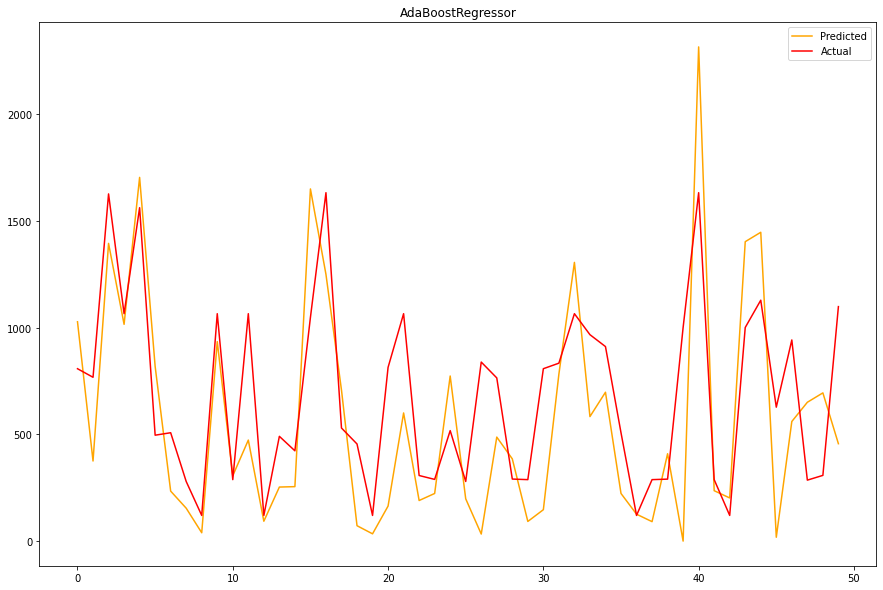

In [114]:
# PLOTTING FIRST 50 Y_TEST AND Y_PRED
plt.figure(figsize=(15,10))
plt.plot(np.array(Y_test[:50]), color = "orange")
plt.plot(y_pred[:50], color = "red")
plt.title("AdaBoostRegressor")
plt.legend(["Predicted","Actual"])
plt.show()

GradientBoostingRegressor

In [115]:
# IMPORTING GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [116]:
# PERFORMING HYPERPARAMETER TUNNING AND FITTING THE TRAIN DATASET 
rf_grid = GridSearchCV( GradientBoostingRegressor(),
                       param_grid ={
    "learning_rate": [0.001, 0.1],
    "min_samples_split": [5,2,6],
    "min_samples_leaf": [5,6,7],
    "max_depth":[8,9,10],
    "max_features":["auto"],
    "criterion": ["friedman_mse"],
    "n_estimators":[50]
    }, cv=5
                       , verbose=2, scoring='roc_auc')
rf_grid.fit(X_train,Y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END criterion=friedman_mse, learning_rate=0.001, max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=50; total time=   1.0s
[CV] END criterion=friedman_mse, learning_rate=0.001, max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=50; total time=   0.9s
[CV] END criterion=friedman_mse, learning_rate=0.001, max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=50; total time=   0.9s
[CV] END criterion=friedman_mse, learning_rate=0.001, max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=50; total time=   0.9s
[CV] END criterion=friedman_mse, learning_rate=0.001, max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=50; total time=   0.9s
[CV] END criterion=friedman_mse, learning_rate=0.001, max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['friedman_mse'],
                         'learning_rate': [0.001, 0.1], 'max_depth': [8, 9, 10],
                         'max_features': ['auto'],
                         'min_samples_leaf': [5, 6, 7],
                         'min_samples_split': [5, 2, 6], 'n_estimators': [50]},
             scoring='roc_auc', verbose=2)

In [117]:
# BEST HYPER PARAMETER
rf_grid.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 0.001,
 'max_depth': 8,
 'max_features': 'auto',
 'min_samples_leaf': 5,
 'min_samples_split': 5,
 'n_estimators': 50}

In [118]:
# USING BEST HYPER PARAMENTER OM THE MODEL
gbr = GradientBoostingRegressor(criterion = 'friedman_mse',
  learning_rate = 0.1,
  max_depth = 25,
  max_features = 'auto',
  min_samples_leaf = 20,
  min_samples_split = 10,
  n_estimators = 50)

In [119]:
#  MODEL FITIING ON TRAIN DATASET
gbr.fit(X_train, Y_train)

GradientBoostingRegressor(max_depth=25, max_features='auto',
                          min_samples_leaf=20, min_samples_split=10,
                          n_estimators=50)

In [120]:
# PREDICTING X_TEST
y_pred = gbr.predict(X_test)

In [121]:
# R_SQUARED
r2_score(Y_test, y_pred)

0.8915422581415864

In [122]:
#  MODEL FITIING ON TRAIN DATASET
gbr.score(X_train, Y_train)

0.9680545053226108

In [123]:
#  MODEL FITIING ON TEST DATASET
gbr.score(X_test, Y_test)

0.8915422581415864

In [124]:
# ADJUSTED R-SQURED , MEAN SQUARED ERROR, ROOT MEAN SQUARED ERROR
print("Adjusted R2 : ",1-(1-r2_score((Y_test), (y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
MSE  = mean_squared_error(Y_test, y_pred)
print("MSE :" , MSE)
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

Adjusted R2 :  0.8907436737560666
MSE : 44380.24482552315
RMSE : 210.66619288704857


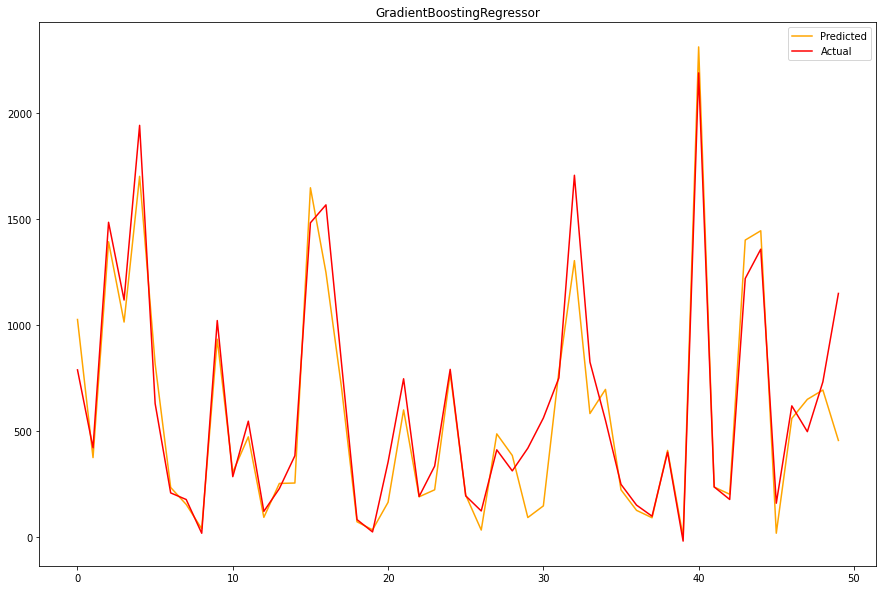

In [125]:
# PLOTTING FIRST 50 Y_TEST AND Y_PRED
plt.figure(figsize=(15,10))
plt.plot(np.array(Y_test[:50]), color = "orange")
plt.plot(y_pred[:50], color = "red")
plt.title("GradientBoostingRegressor")
plt.legend(["Predicted","Actual"])
plt.show()

XGB

In [126]:
# IMPORTING XGBRegressor
from xgboost import XGBRegressor

In [127]:
# PERFORMING HYPERPARAMETER TUNNING AND FITTING THE TRAIN DATASET 
rf_grid = GridSearchCV(XGBRegressor(),
                       param_grid = {"min_child_weight":[10,20], 
            'eta': [0.004,0.1, 0.11, 0.01], 
            'colsample_bytree':[0.7, 0.1], 
            'max_depth': [15,17, 20],
          
          }, cv=5 , verbose=2)
rf_grid.fit(X_train,Y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[14:34:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END colsample_bytree=0.7, eta=0.004, max_depth=15, min_child_weight=10; total time=   1.5s
[14:34:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END colsample_bytree=0.7, eta=0.004, max_depth=15, min_child_weight=10; total time=   1.5s
[14:34:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END colsample_bytree=0.7, eta=0.004, max_depth=15, min_child_weight=10; total time=   1.5s
[14:34:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END colsample_bytree=0.7, eta=0.004, max_depth=15, min_child_weight=10; total time=   1.5s
[14:34:08] WARNING: /workspace/src/objective/r

GridSearchCV(cv=5, estimator=XGBRegressor(),
             param_grid={'colsample_bytree': [0.7, 0.1],
                         'eta': [0.004, 0.1, 0.11, 0.01],
                         'max_depth': [15, 17, 20],
                         'min_child_weight': [10, 20]},
             verbose=2)

In [128]:
# BEST HYPER PARAMETER
rf_grid.best_params_

{'colsample_bytree': 0.7,
 'eta': 0.004,
 'max_depth': 20,
 'min_child_weight': 20}

In [150]:
# USING BEST HYPER PARAMENTER OM THE MODEL
xbr = XGBRegressor(
    colsample_bytree = 0.7,
    eta = 0.004,
    n_estimators = 100,
    gamma = 2,
 learning_rate = 0.1,
  max_depth = 25,
  min_child_weight = 15)

In [151]:
#  MODEL FITIING ON TRAIN DATASET
xbr.fit(X_train, Y_train)

[14:40:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(colsample_bytree=0.7, eta=0.004, gamma=2, max_depth=25,
             min_child_weight=15)

In [152]:
# PREDICTING X_TEST
y_pred = xbr.predict(X_test)

In [153]:

# R_SQUARED
r2_score(Y_test, y_pred)

0.8910984037576581

In [154]:
#  MODEL FITIING ON TRAIN DATASET
xbr.score(X_train, Y_train)

0.990988031123465

In [155]:
#  MODEL FITIING ON TEST DATASET
xbr.score(X_test, Y_test)

0.8910984037576581

In [156]:
# ADJUSTED R-SQURED , MEAN SQUARED ERROR, ROOT MEAN SQUARED ERROR
print("Adjusted R2 : ",1-(1-r2_score((Y_test), (y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
MSE  = mean_squared_error(Y_test, y_pred)
print("MSE :" , MSE)
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

Adjusted R2 :  0.8902965512312534
MSE : 44561.86732556866
RMSE : 211.09681979027695


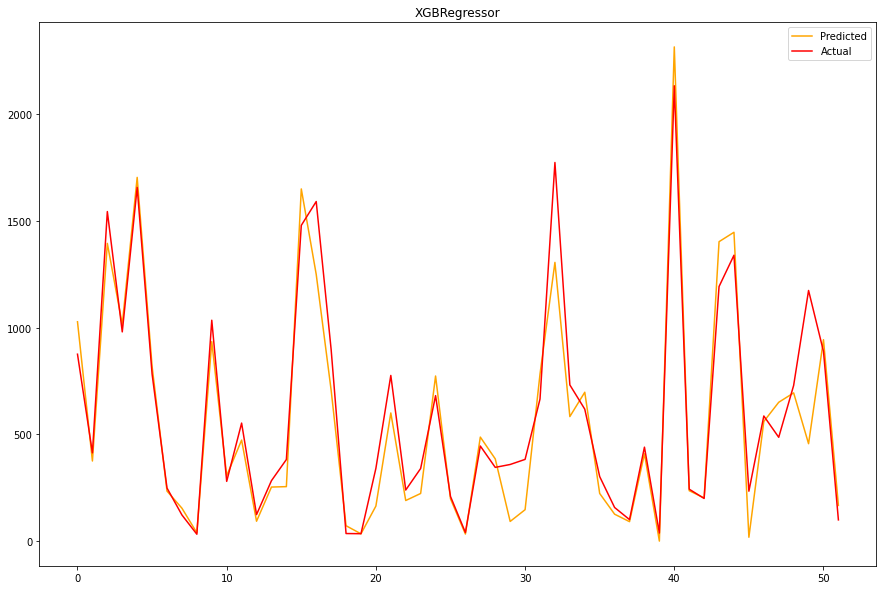

In [157]:
# PLOTTING FIRST 50 Y_TEST AND Y_PRED
plt.figure(figsize=(15,10))
plt.plot(np.array(Y_test[:52]), color = "orange")
plt.plot(y_pred[:52], color = "red")
plt.title("XGBRegressor")
plt.legend(["Predicted","Actual"])
plt.show()